In [2]:
import os
import nltk
import sys
import numpy as np
import pandas as pd
#reload(sys)
#sys.setdefaultencoding("utf-8")

import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
% matplotlib inline

In [2]:
path = 'corpora/williamsburg_hiphighretailbars'

In [3]:
myfolder = os.listdir(path)
raw = []

In [4]:
slash = '/'

In [54]:
for filename in myfolder:
    if filename.endswith('.txt'):
        with open(path + slash + filename, 'r', encoding='utf-8') as fh:
            contents = fh.read()
            raw.append(contents)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Preprocessing corpus for analysis. As you can see, the corpus contains the text taken directly from the articles themselves. In order to prepare for analysis, we need to tokenize text, set it to lowercase, stem words, and lemmatize the text. Tokenization will be executed later using TfidfVectorizer for NMF and CountVectorizer for LDA.

In [9]:
from nltk.corpus import stopwords
ENGLISH_STOP_WORDS = set(stopwords.words('english'))
random_words = ["miss", "mr", "mrs", "said", "jr", "ms"]
nytimes_words = ["photo", "nytimes", "nytoday", "com", "www"]
custom_words = "___ saying hours told news people like new going time think saturday _____ briefing posted eastern want email stories weekdays sundays rundown latest look sign let convention week american year say house york make know day late comedy host cbs report character guest night little last also life much each two many tomorrow free org th minimum little Sonneh feet street man st door play one would years get even could way back around avenue streets says go really made something still got came come right always sanneh percent nd near co la sisario go says made another still around called things city see well"
month_time_dayofweek = "january february march april may june july august september october november december sunday monday tuesday wednesday thursday friday morning noon night weekday weekend evening mondays tuesdays wednesdays thursdays fridays saturdays sundays"
numbers_list = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]
custom_words_list = custom_words.split()
month_time_day_list = month_time_dayofweek.split()

STOPLIST = set(stopwords.words('english') + random_words + numbers_list + list(month_time_day_list) + list(ENGLISH_STOP_WORDS) + nytimes_words + custom_words_list)
STOPLIST = list(STOPLIST)

# Topic Modeling with n_topics=10

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

#function to display the topics and terms that make up each topic for both models -- will be called at the end
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        #print "Topic %d:" % (topic_idx)
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


#documents will come from the list created from above
documents = raw

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=STOPLIST)
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=STOPLIST)
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

#specify number of topics
no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

#specify number of topic words
no_top_words = 10
print("NMF\n")
display_topics(nmf, tfidf_feature_names, no_top_words)
print("\nLDA\n")
display_topics(lda, tf_feature_names, no_top_words)

C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


NMF

Topic 0:
212 tonight pareles jazz 30 admission band ratliff tickets 10
Topic 1:
music first brooklyn old home friends school work young world
Topic 2:
art museum 212 show paintings gallery exhibition johnson artists artist
Topic 3:
petrusich 212 band rock songs pop music album advance east
Topic 4:
building 000 apartments buildings development bedroom housing apartment neighborhood market
Topic 5:
bar restaurant menu restaurants bars beer wine food drink brooklyn
Topic 6:
dance dunning tickets tonight theater 212 opera ballet program music
Topic 7:
212 meeting information 10 sponsored tours park museum children students
Topic 8:
post mayor state bloomberg officials daily police department plan public
Topic 9:
store shop design stores brooklyn designer bedford retail opened furniture

LDA

Topic 0:
design store fashion designer style work furniture shirts collection home
Topic 1:
brooklyn first old music good world show long williamsburg young
Topic 2:
men women cup moses team worl

# Topic Modeling with n_topics=12

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

#function to display the topics and terms that make up each topic for both models -- will be called at the end
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        #print "Topic %d:" % (topic_idx)
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


#documents will come from the list created from above
documents = raw

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=STOPLIST)
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=STOPLIST)
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

#specify number of topics
no_topics = 12

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

#specify number of topic words
no_top_words = 10
print("NMF\n")
display_topics(nmf, tfidf_feature_names, no_top_words)
print("\nLDA\n")
display_topics(lda, tf_feature_names, no_top_words)

C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


NMF

Topic 0:
tonight 212 pareles jazz admission 30 ratliff tickets 10 band
Topic 1:
home brooklyn old first school work friends young apartment long
Topic 2:
art museum show paintings gallery 212 exhibition artists johnson artist
Topic 3:
212 east west theater 30 307 7171 bowery ballroom 533
Topic 4:
building 000 buildings apartments development housing bedroom neighborhood developers square
Topic 5:
bar restaurant bars beer menu restaurants wine food drink opened
Topic 6:
dance dunning tickets tonight theater opera ballet 212 program music
Topic 7:
information meeting sponsored 10 212 museum tours park children fee
Topic 8:
post mayor state bloomberg officials daily police department council plan
Topic 9:
store shop design stores designer brooklyn bedford retail opened furniture
Topic 10:
music band rock album songs bands pop indie club guitar
Topic 11:
petrusich band 745 3000 rock pop advance songs 800 album

LDA

Topic 0:
work fashion show film design style times designer first art

In [25]:
tryit = pd.DataFrame(nmf.components_)
tryit

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.599185,0.006572,0.014204,0.263381,0.056926,0.195413,0.037326,0.000000,0.007847,...,0.000000,0.032559,0.005703,0.017305,0.000194,0.000257,0.000000,0.057706,0.017116,0.007675
1,0.198120,0.111154,0.054695,0.013252,0.056351,0.000973,0.028695,0.000000,0.046106,0.038569,...,0.014081,0.273697,0.065419,0.050167,0.118384,0.117887,0.089137,0.280599,0.041607,0.061845
2,0.000000,0.078319,0.029926,0.001620,0.064553,0.000000,0.034360,0.000000,0.033832,0.046135,...,0.008069,0.112742,0.016492,0.005417,0.000000,0.050758,0.000000,0.053170,0.014999,0.007147
3,0.000000,0.208064,0.023178,0.032490,0.063441,0.097609,0.065471,0.144652,0.043476,0.027142,...,0.005170,0.037647,0.000348,0.000000,0.014909,0.000000,0.000000,0.031034,0.002681,0.000000
4,0.703895,0.056467,0.065770,0.005410,0.002524,0.019644,0.028567,0.006487,0.000000,0.018158,...,0.000000,0.000000,0.016972,0.000000,0.000000,0.065626,0.013185,0.000000,0.000000,0.000000
5,0.000000,0.026550,0.047097,0.025041,0.055322,0.000000,0.029012,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.026577,0.000000,0.000000,0.068595,0.011603,0.009152,0.000000,0.000000
6,0.000000,0.075789,0.010950,0.059462,0.000000,0.000000,0.118361,0.000000,0.025235,0.040330,...,0.100501,0.028418,0.007672,0.016507,0.000657,0.003219,0.000000,0.058286,0.000000,0.003415
7,0.000000,0.590046,0.019652,0.008828,0.440173,0.000000,0.445342,0.000000,0.061533,0.070275,...,0.067777,0.044750,0.000000,0.000000,0.000589,0.000000,0.000734,0.000000,0.085677,0.001462
8,0.085920,0.026109,0.050954,0.000000,0.047636,0.000000,0.020843,0.001277,0.013519,0.008525,...,0.000000,0.012164,0.005005,0.000000,0.000413,0.002026,0.044695,0.000000,0.000000,0.000000
9,0.021006,0.000000,0.034947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008817,0.008241,0.000000,0.000000


In [20]:
nmf.get_params(deep=True)

{'alpha': 0.1,
 'beta_loss': 'frobenius',
 'init': 'nndsvd',
 'l1_ratio': 0.5,
 'max_iter': 200,
 'n_components': 12,
 'random_state': 1,
 'shuffle': False,
 'solver': 'cd',
 'tol': 0.0001,
 'verbose': 0}

In [7]:
#tf_feature_names

In [3]:
path = 'corpora/williamsburg_hiphighretailbars'

myfolder = os.listdir(path)
articles = []

slash = '/'

for filename in myfolder:
    if filename.endswith('.txt'):
        date = filename[0:10]
        with open(path + slash + filename, 'r', encoding='utf-8') as fh:
            contents = fh.read()
            articles.append([contents, date])
            
raw = pd.DataFrame(articles, columns=['Contents','Date'])

In [10]:
raw.to_csv('nyt_copy.csv', index=False)

In [68]:
#Define the TFIDF vectorizer that will be used to process the data
tfidf_vectorizer = TfidfVectorizer()
#Apply this vectorizer to the full dataset to create normalized vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(raw)

In [80]:
raw = raw.reset_index()

In [4]:
raw.head()

,Contents,Date
0,"EVEN people with faith in nothing, people who ...",2000-01-02
1,"Correction Appended\nTENEMENTS, yes. Luxury ho...",2000-01-06
2,"Two years ago, Joe, the man I lived with, sugg...",2000-01-14
3,IF they didn't play their luck out in furnitur...,2000-01-20
4,"FOR years, Tequila's on Columbus held out a we...",2000-01-26


In [15]:
nyt_copy = raw[['Date', 'Contents']]
nyt_copy.head()

,Date,Contents
0,2000-01-02,"EVEN people with faith in nothing, people who ..."
1,2000-01-06,"Correction Appended\nTENEMENTS, yes. Luxury ho..."
2,2000-01-14,"Two years ago, Joe, the man I lived with, sugg..."
3,2000-01-20,IF they didn't play their luck out in furnitur...
4,2000-01-26,"FOR years, Tequila's on Columbus held out a we..."


In [20]:
nyt_copy.to_csv('nyt_copy.csv', encoding='utf-8')

In [22]:
nyt_c = pd.read_csv('nyt_copy.csv', index_col='Date')['Contents']
print(len(nyt_c))
print 
print(nyt_c.head())

1720
Date
2000-01-02    EVEN people with faith in nothing, people who ...
2000-01-06    Correction Appended\r\nTENEMENTS, yes. Luxury ...
2000-01-14    Two years ago, Joe, the man I lived with, sugg...
2000-01-20    IF they didn't play their luck out in furnitur...
2000-01-26    FOR years, Tequila's on Columbus held out a we...
Name: Contents, dtype: object


In [115]:
#raw.to_csv('raw2', encoding='utf-8')
text = pd.read_csv('raw2')
text.head()

,Unnamed: 0,index,Contents,Date
0,0,0,"EVEN people with faith in nothing, people who ...",2000-01-02
1,1,1,"Correction Appended\r\nTENEMENTS, yes. Luxury ...",2000-01-06
2,2,2,"Two years ago, Joe, the man I lived with, sugg...",2000-01-14
3,3,3,IF they didn't play their luck out in furnitur...,2000-01-20
4,4,4,"FOR years, Tequila's on Columbus held out a we...",2000-01-26


In [128]:
text['Contents'][0]

"EVEN people with faith in nothing, people who barely believe in their mothers, know that certain inexplicable powers do exist in this world.\r\nLike real estate karma.\r\nNathanael Sandstrom is proof of that, although fortunately, he is completely modest, the kind of person so grateful for his good luck that he has started doing charity work to be sure he continues to deserve his fate.\r\nAt the moment, Mr. Sandstrom, 30, is living in a legal sublet on the Upper West Side, a spacious one-bedroom apartment with a very large terrace on West 76th Street, not far from Central Park. Although a walkup, this is the kind of place that newcomers to New York imagine but rarely find: convenient, pleasingly old, in an exciting neighborhood.\r\nHis rent is $1,190 a month, ''practically free,'' he says, with the irony of someone who knows that on the open market that amount of money in this neighborhood would get him an apartment the size of a jail cell. The rent is low, he says, because the regula

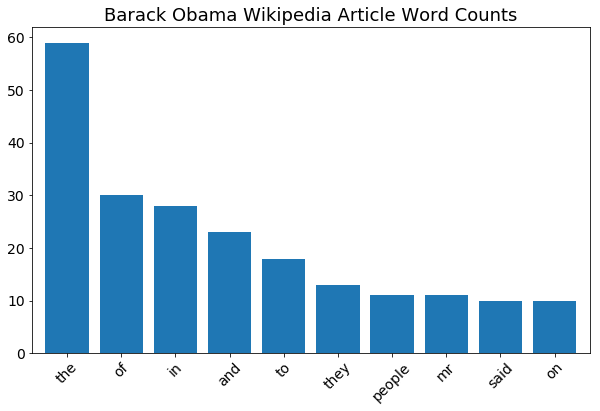

In [150]:
#Extract text for a particular person
text1 = text['Contents'][7]
#Define the count vectorizer that will be used to process the data
count_vectorizer = CountVectorizer()
#Apply this vectorizer to text to get a sparse matrix of counts
count_matrix = count_vectorizer.fit_transform([text1])
#Get the names of the features
features = count_vectorizer.get_feature_names()
#Create a series from the sparse matrix
d = pd.Series(count_matrix.toarray().flatten(), 
              index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=45,
            title='Barack Obama Wikipedia Article Word Counts')
ax.title.set_size(18)

In [153]:
#Define the TFIDF vectorizer that will be used to process the data
tfidf_vectorizer = TfidfVectorizer()
#Apply this vectorizer to the full dataset to create normalized vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
#Get the names of the features
features = tfidf_vectorizer.get_feature_names()